In [ ]:
import os
import pandas as pd
import sevenbridges as sbg
from ggplot import *

In [2]:
token = os.environ['CAVATICA_ZYK_TOKEN']
url = 'https://cavatica-api.sbgenomics.com/v2/'
pilot = 'yuankun/kf-genomics-harmonization-pilot'
broad = 'yuankun/kf-genomics-harmonization-pilot-broad'
washu = 'yuankun/kf-genomics-harmonization-pilot-washu'
data = {}

In [3]:
api = sbg.Api(url=url, token=token)
# tasks = api.tasks.query(project=pjt).all()

In [ ]:
for task in tasks:
    if task.batch:
        for child in task.get_batch_children():
            job = child.get_execution_details()
            try:
                runtime = (job.end_time-job.start_time).seconds
                data[child.name] = {
                    'batch': task.name,
                    'runtime': runtime,
                    'cost': child.price.amount,
                    'status': job.status
                }
#                 print child.name, task.name, child.price.amount,
#                 print runtime, job.status
            except:
                continue
df = pd.DataFrame.from_dict(data, orient='index')

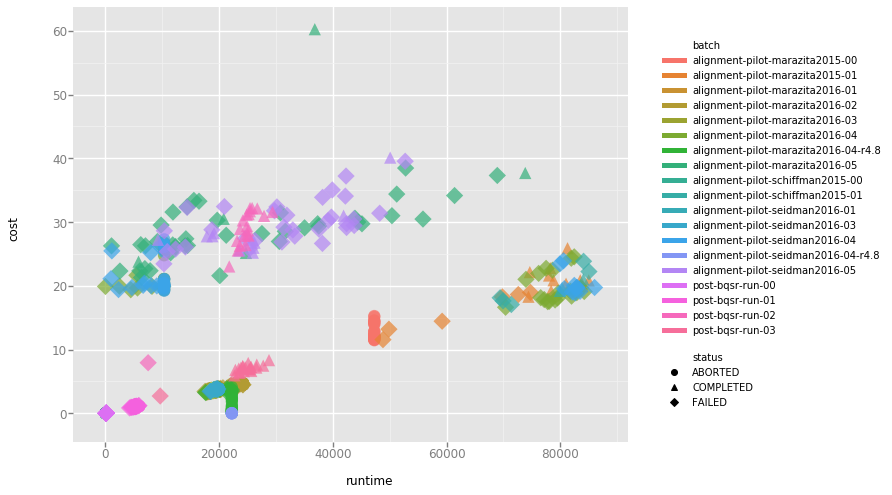

<ggplot: (283530441)>

In [6]:
df
ggplot(aes(x='runtime', y='cost', color='batch', shape='status'), data=df) +\
    geom_point(size=150, alpha=.7)

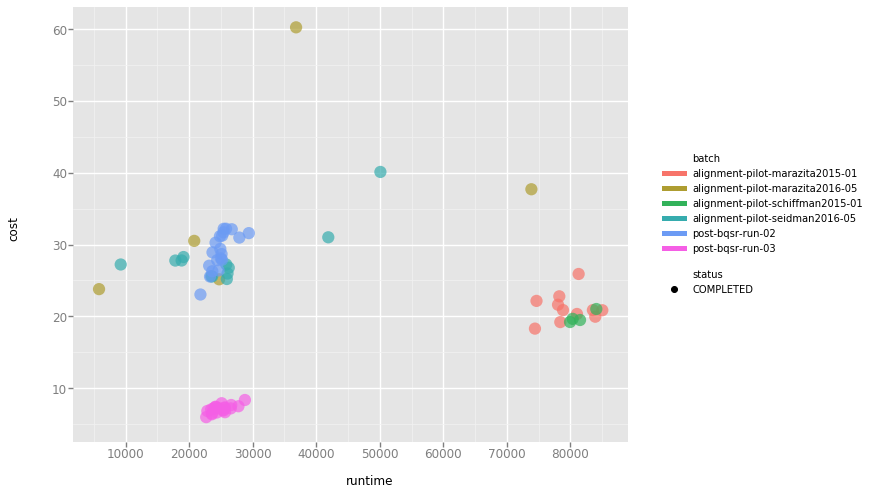

<ggplot: (288009393)>

In [7]:
finished=df[df['status']=='COMPLETED']
ggplot(aes(x='runtime', y='cost', color='batch', shape='status'), data=finished) +\
    geom_point(size=150, alpha=.7)

In [ ]:
# batch tasks from kf-genomics-harmonization-pilot-broad

broad_task = api.tasks.get(id='8ad7507c-b0cf-48e3-9c76-61ac09d0fecf')

for child in broad_task.get_batch_children():
    job = child.get_execution_details()
    try:
        runtime = (job.end_time-job.start_time).seconds
        data[child.name] = {
            'runtime': runtime,
            'cost': child.price.amount,
            'status': job.status
        }
    except:
        continue

df = pd.DataFrame.from_dict(data, orient='index')

ggplot(aes(x='runtime', y='cost', color='status'), data=df) +\
    geom_point(size=150, alpha=.7)